# **K-Means SEGMENTATION → OBJECT LOCALIZATION**

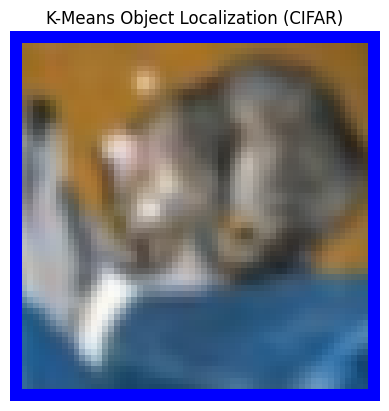

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #Imports the KMeans class from scikit-learn, which is used to group data into K clusters based on feature similarity.
import torchvision
# Load CIFAR-10 image directly
dataset = torchvision.datasets.CIFAR10(root="./data",train=False,download=True)
#convert pil -->opencv                       #PIL = Python Imaging Library
img_pil, label = dataset[0]      # take one image
img = np.array(img_pil)          # PIL -> NumPy (RGB)
# Resize for clustering
img = cv2.resize(img, (64, 64))
# K-Means clustering
pixels = img.reshape((-1, 3))
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels)
labels = labels.reshape(64, 64)
# Object mask (center-based)
mask = (labels == labels[32, 32]).astype(np.uint8)
ys, xs = np.where(mask == 1)
# Bounding box
x1, y1, x2, y2 = xs.min(), ys.min(), xs.max(), ys.max()
cv2.rectangle(img, (x1, y1), (x2, y2), (0,0, 255), 2)
# Display (Colab-safe)
plt.imshow(img)
plt.title("K-Means Object Localization (CIFAR)")
plt.axis("off")
plt.show()